## Task 1

In [54]:
import pandas as pd
import numpy as np
import os
import string
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV

In [104]:
#Importing the car reviews
data = pd.read_csv(r'Downloads/car_reviews.csv')
#Initialising a stemmer, using PorterStemmer
stemmer = PorterStemmer()
#Compiling a list of stopwords, common punctuation
stop = set(stopwords.words('english')+list(string.punctuation))
#Converting all words to lowercase and implementing stemming
data['Stemmed Review'] = data['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.lower().split() if word not in (stop)]))
#Removed all words from corpus which are stopwords, punctuation
data.head()

,Sentiment,Review,Stemmed Review
0,Neg,In 1992 we bought a new Taurus and we really loved it So in 1999 we decided to try a new Tauru...,1992 bought new tauru realli love 1999 decid tri new tauru care style newer version bought anywa...
1,Neg,The last business trip I drove to San Francisco I went to Hertz Rentals and got a 1999 Ford T...,last busi trip drove san francisco went hertz rental got 1999 ford tauru think look comfort prof...
2,Neg,My husband and I purchased a 1990 Ford F250 and had nothing but problems we have owned the veh...,husband purchas 1990 ford f250 noth problem own vehicl approxim two year spent least half time s...
3,Neg,I feel I have a thorough opinion of this truck compared to most who post evaluations of their v...,feel thorough opinion truck compar post evalu vehicl truck own sinc new current 75k mile meticul...
4,Neg,AS a mother of 3 all of whom are still in carseats the only logical thing to do was to trade ...,mother 3 still carseat logic thing trade 200sx minivan minivan one hand vehicl room famili requi...


In [105]:
pd.options.display.max_colwidth = 1000
data['Review'][1]

' The last business trip  I drove to San Francisco  I went to Hertz Rentals and got a 1999 Ford Taurus  thinking it looked comfortable and professional  I found the seating to be uncomfortable for myself  as well as for my passenger Now  seating comfort may not be important to you  but it is to me The fuel usage was fine  the car did get us there with no problems  but  it was such an uncomfortable ride for both of us  It is not as though I am hard to fit into a car  I am 5 5  weigh 115 pounds  and I am usually quite comfortable in most any car  But  the Taurus seemed especially uncomfortable  For anyone who is thinking of renting a car for a long trip  I would suggest that the Ford Taurus  1999  not be on the list of  be sure to get this There was a large trunk that allowed us to pack a lot of materials needed for the business end of the trip  Driving it was a breeze  and everything  worked  right  I have no complaints about the standard making of the car  except in the comfort area  H

In [106]:
data['Stemmed Review'][1]

'last busi trip drove san francisco went hertz rental got 1999 ford tauru think look comfort profession found seat uncomfort well passeng seat comfort may import fuel usag fine car get us problem uncomfort ride us though hard fit car 5 5 weigh 115 pound usual quit comfort car tauru seem especi uncomfort anyon think rent car long trip would suggest ford tauru 1999 list sure get larg trunk allow us pack lot materi need busi end trip drive breez everyth work right complaint standard make car except comfort area import comfort long trip uncomfort driver distract made trip seem unnecessarili longer felt make trip lot saturn would better choic rent model quit often offer comfort tauru simpli plan long trip buy car intend comfort seat check tauru longer trial basi might anoth car may find thing happen comfort'

#### The previous 2 cells demonstrate the changes made to the review, words such as:
* comfort, comfortable have been stemmed to comfort
* making, make have been stemmed to make
* renting, rented have been stemmed to rent

In [119]:
#Splitting data into train and test data with 80-20 split
x_train,x_test,y_train, y_test = train_test_split(data['Stemmed Review'], data['Sentiment'], test_size=0.20, random_state=30)
print("Train: ",x_train.shape,y_train.shape,"Test: ",(x_test.shape,y_test.shape))
#Count vectorizer converts a collection of reviews to a matrix of token counts.
bagofwordsconverter = CountVectorizer()
#The matrix is stored in a Tensorflow tensor
tf_x_train = bagofwordsconverter.fit_transform(x_train)
tf_x_test = bagofwordsconverter.transform(x_test)

Train:  (1105,) (1105,) Test:  ((277,), (277,))


In [112]:
tf_x_train.toarray()

array([[0, 2, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 6, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [109]:
from sklearn.naive_bayes import MultinomialNB
#Training a Multinomial Naive-Bayes Classifier only on training data
classifier = MultinomialNB()
classifier.fit(tf_x_train, y_train)
#Predicting the class for test dataset
y_pred = classifier.predict(tf_x_test)

The Multinomial Naive-Bayes Classifier achieved an accuracy of 75.45%


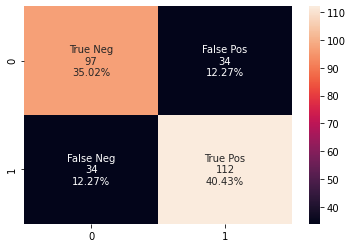

In [113]:
#Creating a confusion matrix and printing accuracies
conf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')
print('The Multinomial Naive-Bayes Classifier achieved an accuracy of {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

## Task 2

While the bag of words technique counts the occurences of each individual token in the review, “Term frequency–inverse document frequency (TF-IDF) , is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.” 


The Term Frequent (TF) is a measure of how frequently a token, e.g."car", appears in a document "d". The denominator is the total number of tokens in the document:
$$tf_{car,d} =  \frac{n_{car,d}}{N_{d}}$$ 

Inverse Document Frequency (IDF) is a measure of how important a term is. We need the IDF value because computing just the TF alone is not sufficient to understand the importance of words. The numerator is the total number of documents, and the denominator is the total number of documents containing the token "car":
$$idf_{car} =  log{\frac{N}{N_{car}}}$$



Tokens which are present in every car review, e.g.stopwords have very little importance as their IDF value would reduce to 0. While tokens which are uncommon, e.g. adjectives will have higher IDF values.

We can now compute the TF-IDF score for each word in the corpus. Words with a higher score are more important, and those with a lower score are less important:
$$tf\_idf_{car,d} = tf_{car,d}*idf_{car}$$


This statistic was calculated for all the tokens in the collection of reviews, and another Multinomial Naive-Bayes classification model was trained on the data.

Source - https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.121.1424&rep=rep1&type=pdf

In [114]:
#Using TF-IDF
from sklearn.model_selection import train_test_split
#Splitting data into 80-20 train-test
x_train,x_test,y_train, y_test = train_test_split(data['Stemmed Review'], data['Sentiment'], test_size=0.20, random_state=30)
print("Train: ",x_train.shape,y_train.shape,"Test: ",(x_test.shape,y_test.shape))
#The below method creates a matrix of the TF-IDF statistic for each token in the collection of reviews
tfidfconverter = TfidfVectorizer()
#The matrix is stored in a Tensorflow tensor
tf_x_train = tfidfconverter.fit_transform(x_train)
tf_x_test = tfidfconverter.transform(x_test)

Train:  (1105,) (1105,) Test:  ((277,), (277,))


In [115]:
tf_x_train.toarray()[:5]

array([[0.        , 0.04386611, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05577717, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09763813, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [116]:
from sklearn.naive_bayes import MultinomialNB
#Training a Multinomial Naive-Bayes Classifier
classifier = MultinomialNB()
classifier.fit(tf_x_train.toarray(), y_train)

MultinomialNB()

Hyperparameter tuning - This technique is used to find the optimal value of parameters in the Multinomial Naive Bayes model. Each possible parameter combination is tried using k-fold cross validation. 

K-Fold cross validation is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point, while the rest of the folds are used for training. 

#### Below it is attempted to find the best value of alpha based on the highest training accuracy. 

In [67]:
#Defining a dictionary of parameters and possible values.
grid_params = {
  'alpha': np.linspace(0.5, 1.5, 100),  
}

#The GridSearchCV method tries out each possible parameter combination using a k-fold cross validation technique
gd=GridSearchCV(estimator=classifier,param_grid=grid_params,cv=10,verbose=True)

gd.fit(tf_x_train,y_train)
#Prints the best training accuracy and the optimal alpha value
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0.7954545454545455
MultinomialNB(alpha=0.5)


In [81]:
#Setting the optimal alpha value
classifier = MultinomialNB(alpha=0.5)
classifier.fit(tf_x_train.toarray(), y_train)
#Predicting the class for test data
y_pred = classifier.predict(tf_x_test.toarray())

The Updated Multinomial Naive-Bayes Classifier achieved an accuracy of 76.90%


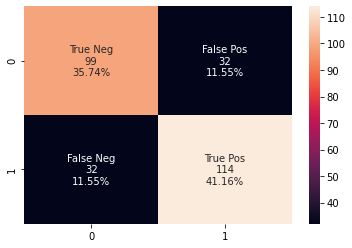

In [82]:
#Creating a confusion matrix and printing accuracies
conf_matrix = confusion_matrix(y_test,y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt='')
print('The Updated Multinomial Naive-Bayes Classifier achieved an accuracy of {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))

## Discussion

The combination of TF-IDF and tuning the parameter alpha improved the accuracy on the test set by 1.45%, it identified only 4 more reviews correctly. By including the importance of the word it did not improve the model performance vastly. 

While TF-IDF may be able to capture the most descriptive terms in a review, the top descriptive terms identified may not be directly related to the topic of cars. Additionally as the IDF metric punishes words which appear frequently in other documents, hence there could be common descriptive words such as 'bad' which should be given more importance in judging sentiment which have reduced TF-IDF scores, as illustrated in the example below.

In [98]:
#Example Review
sample_review=data['Stemmed Review'][3]
sample_sentiment=data['Sentiment'][3]
feature_array = np.array(tfidfconverter.get_feature_names())
tfidf_sorting = np.argsort(tfidfconverter.transform([new_s]).toarray()).flatten()[::-1]

#Printing out the top 10 words generated by TF-IDF metric
n = 10
top_n = feature_array[tfidf_sorting][:n]
print('The top 10 words are : {}'.format(top_n))
print('The review was : {}'.format(sample_sentiment))
#Here the word 'bad' which should have been the main factor in deciding the sentiment is ranked 9th in importance by the TF-IDF metric

The top 10 words are : ['75k' 'bumper' 'warranti' 'extend' 'truck' 'bumber' 'mile' 'mainten'
 'bad' 'spray']
The review was : Neg
